In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [2]:
now = datetime.now()

start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2015-05-04   28.742273   29.159898   28.644009   28.920936  203953200
2015-05-05   28.094620   28.686437   28.090152   28.619438  197085600
2015-05-06   27.918190   28.306780   27.549699   28.264347  288564000
2015-05-07   28.090872   28.274765   27.812788   27.980983  175763600
2015-05-08   28.620134   28.620134   28.281500   28.409329  222201600
...                ...         ...         ...         ...        ...
2025-04-28  210.139999  211.500000  207.460007  210.000000   38743100
2025-04-29  211.210007  212.240005  208.369995  208.690002   36827600
2025-04-30  212.500000  213.580002  206.669998  209.300003   52286500
2025-05-01  213.320007  214.559998  208.899994  209.080002   57365700
2025-05-02  205.350006  206.990005  202.160004  206.089996  100912500

[2516 rows x 5 columns]

In [3]:
df.head()

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-05-04  28.742273  29.159898  28.644009  28.920936  203953200
2015-05-05  28.094620  28.686437  28.090152  28.619438  197085600
2015-05-06  27.918190  28.306780  27.549699  28.264347  288564000
2015-05-07  28.090872  28.274765  27.812788  27.980983  175763600
2015-05-08  28.620134  28.620134  28.281500  28.409329  222201600

In [4]:
df.tail()

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2025-04-28  210.139999  211.500000  207.460007  210.000000   38743100
2025-04-29  211.210007  212.240005  208.369995  208.690002   36827600
2025-04-30  212.500000  213.580002  206.669998  209.300003   52286500
2025-05-01  213.320007  214.559998  208.899994  209.080002   57365700
2025-05-02  205.350006  206.990005  202.160004  206.089996  100912500

# 2. Data Exploration & Visualization

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(2516, 5)

In [7]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [8]:
df.describe()

Price         Close         High          Low         Open        Volume
Ticker         AAPL         AAPL         AAPL         AAPL          AAPL
count   2516.000000  2516.000000  2516.000000  2516.000000  2.516000e+03
mean     100.645905   101.653199    99.522945   100.542423  1.116822e+08
std       68.430337    69.100349    67.658701    68.341219  6.471790e+07
min       20.674538    20.978909    20.475437    20.596726  2.323470e+07
25%       37.370715    37.630401    36.970680    37.306496  6.843475e+07
50%       77.180477    77.758602    76.462634    77.070580  9.603795e+07
75%      160.147221   161.867191   157.238329   159.657951  1.361035e+08
max      258.735504   259.814335   257.347047   257.906429  6.488252e+08

In [9]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [10]:
df.head()

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-05-04  28.742273  29.159898  28.644009  28.920936  203953200
2015-05-05  28.094620  28.686437  28.090152  28.619438  197085600
2015-05-06  27.918190  28.306780  27.549699  28.264347  288564000
2015-05-07  28.090872  28.274765  27.812788  27.980983  175763600
2015-05-08  28.620134  28.620134  28.281500  28.409329  222201600

In [11]:
df = df.reset_index()

In [12]:
df.head()

Price        Date      Close       High        Low       Open     Volume
Ticker                  AAPL       AAPL       AAPL       AAPL       AAPL
0      2015-05-04  28.742273  29.159898  28.644009  28.920936  203953200
1      2015-05-05  28.094620  28.686437  28.090152  28.619438  197085600
2      2015-05-06  27.918190  28.306780  27.549699  28.264347  288564000
3      2015-05-07  28.090872  28.274765  27.812788  27.980983  175763600
4      2015-05-08  28.620134  28.620134  28.281500  28.409329  222201600

Text(0, 0.5, 'Close price')

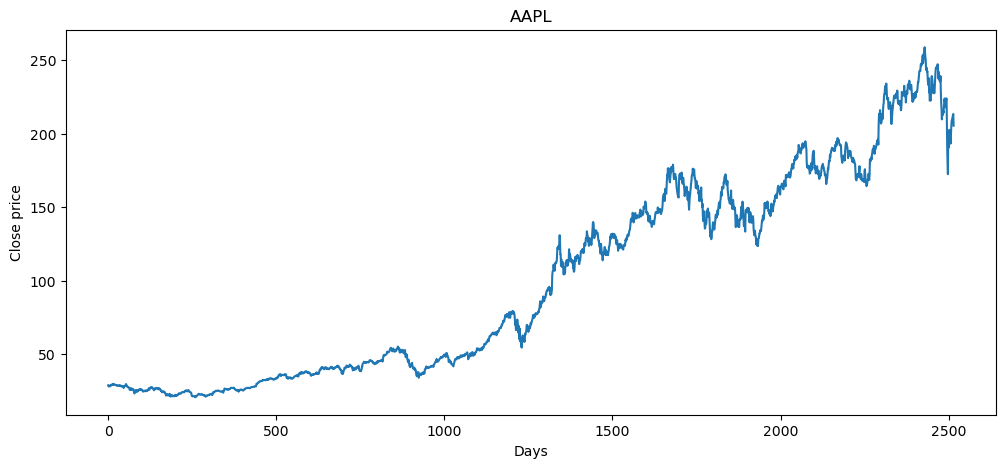

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

# 3. Feature Engineering

In [14]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA of 5 days ==> null null null null 30 40

In [15]:
temp_df = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_df[2:7]) / 5)

50.0


In [16]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

0
0   10
1   20
2   30
3   40
4   50
5   60
6   70
7   80
8   90
9  100

In [17]:
df1['MA_5'] = df1.rolling(5).mean()
df1

0  MA_5
0   10   NaN
1   20   NaN
2   30   NaN
3   40   NaN
4   50  30.0
5   60  40.0
6   70  50.0
7   80  60.0
8   90  70.0
9  100  80.0

### 100 Days Moving Average

In [18]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price        Date      Close       High        Low       Open     Volume  \
Ticker                  AAPL       AAPL       AAPL       AAPL       AAPL   
0      2015-05-04  28.742273  29.159898  28.644009  28.920936  203953200   
1      2015-05-05  28.094620  28.686437  28.090152  28.619438  197085600   
2      2015-05-06  27.918190  28.306780  27.549699  28.264347  288564000   
3      2015-05-07  28.090872  28.274765  27.812788  27.980983  175763600   
4      2015-05-08  28.620134  28.620134  28.281500  28.409329  222201600   

Price  MA_100  
Ticker         
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [19]:
df.head(103)

Price        Date      Close       High        Low       Open     Volume  \
Ticker                  AAPL       AAPL       AAPL       AAPL       AAPL   
0      2015-05-04  28.742273  29.159898  28.644009  28.920936  203953200   
1      2015-05-05  28.094620  28.686437  28.090152  28.619438  197085600   
2      2015-05-06  27.918190  28.306780  27.549699  28.264347  288564000   
3      2015-05-07  28.090872  28.274765  27.812788  27.980983  175763600   
4      2015-05-08  28.620134  28.620134  28.281500  28.409329  222201600   
..            ...        ...        ...        ...        ...        ...   
98     2015-09-22  25.546261  25.721976  25.348017  25.541754  201384800   
99     2015-09-23  25.753508  25.843618  25.523727  25.598067  143026800   
100    2015-09-24  25.906706  26.019344  25.314231  25.512473  200878000   
101    2015-09-25  25.841366  26.287412  25.685925  26.231093  224607600   
102    2015-09-28  25.329990  25.809827  25.329990  25.647628  208436000   

Price      MA_100  
Ticker             
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
..            ...  
98            NaN  
99      27.404061  
100     27.375705  
101     27.353173  
102     27.327291  

[103 rows x 7 columns]

Text(0, 0.5, 'Price')

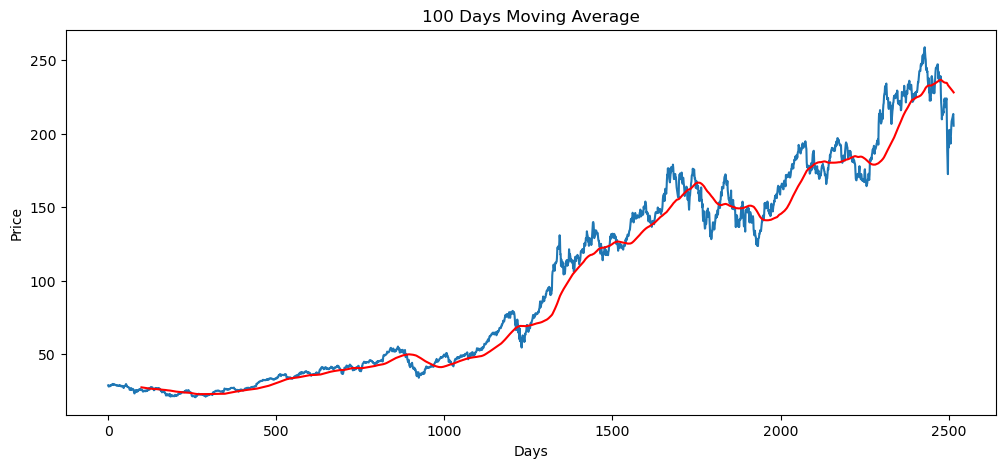

In [20]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

### 200 Days Moving Average

In [21]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price        Date      Close       High        Low       Open     Volume  \
Ticker                  AAPL       AAPL       AAPL       AAPL       AAPL   
0      2015-05-04  28.742273  29.159898  28.644009  28.920936  203953200   
1      2015-05-05  28.094620  28.686437  28.090152  28.619438  197085600   
2      2015-05-06  27.918190  28.306780  27.549699  28.264347  288564000   
3      2015-05-07  28.090872  28.274765  27.812788  27.980983  175763600   
4      2015-05-08  28.620134  28.620134  28.281500  28.409329  222201600   
..            ...        ...        ...        ...        ...        ...   
198    2016-02-16  21.982468  22.030236  21.520709  21.613970  196231600   
199    2016-02-17  22.319117  22.339588  21.871005  21.989288  179452800   
200    2016-02-18  21.896027  22.494266  21.857356  22.482892  156084000   
201    2016-02-19  21.845982  22.009758  21.791390  21.836883  141496800   
202    2016-02-22  22.037054  22.041604  21.818685  21.907398  137123200   

Price      MA_100     MA_200  
Ticker                        
0             NaN        NaN  
1             NaN        NaN  
2             NaN        NaN  
3             NaN        NaN  
4             NaN        NaN  
..            ...        ...  
198     24.652620        NaN  
199     24.618276  26.011168  
200     24.578169  25.976937  
201     24.538215  25.945694  
202     24.505286  25.916288  

[203 rows x 8 columns]

Text(0, 0.5, 'Price')

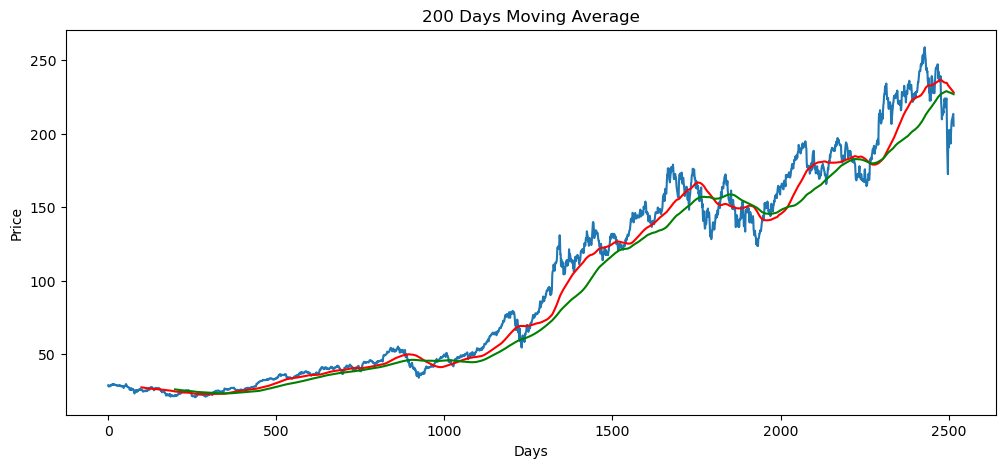

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

In [23]:
df

Price        Date       Close        High         Low        Open     Volume  \
Ticker                   AAPL        AAPL        AAPL        AAPL       AAPL   
0      2015-05-04   28.742273   29.159898   28.644009   28.920936  203953200   
1      2015-05-05   28.094620   28.686437   28.090152   28.619438  197085600   
2      2015-05-06   27.918190   28.306780   27.549699   28.264347  288564000   
3      2015-05-07   28.090872   28.274765   27.812788   27.980983  175763600   
4      2015-05-08   28.620134   28.620134   28.281500   28.409329  222201600   
...           ...         ...         ...         ...         ...        ...   
2511   2025-04-28  210.139999  211.500000  207.460007  210.000000   38743100   
2512   2025-04-29  211.210007  212.240005  208.369995  208.690002   36827600   
2513   2025-04-30  212.500000  213.580002  206.669998  209.300003   52286500   
2514   2025-05-01  213.320007  214.559998  208.899994  209.080002   57365700   
2515   2025-05-02  205.350006  206.990005  202.160004  206.089996  100912500   

Price       MA_100      MA_200  
Ticker                          
0              NaN         NaN  
1              NaN         NaN  
2              NaN         NaN  
3              NaN         NaN  
4              NaN         NaN  
...            ...         ...  
2511    229.250193  227.195553  
2512    228.969025  227.117564  
2513    228.670190  227.031225  
2514    228.375959  226.929751  
2515    228.001728  226.786334  

[2516 rows x 8 columns]

### Calculating % changed in each trading session

In [24]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price        Close Percentage Changed
Ticker        AAPL                   
0        28.742273                NaN
1        28.094620          -0.022533
2        27.918190          -0.006280
3        28.090872           0.006185
4        28.620134           0.018841
...            ...                ...
2511    210.139999           0.004109
2512    211.210007           0.005092
2513    212.500000           0.006108
2514    213.320007           0.003859
2515    205.350006          -0.037362

[2516 rows x 2 columns]

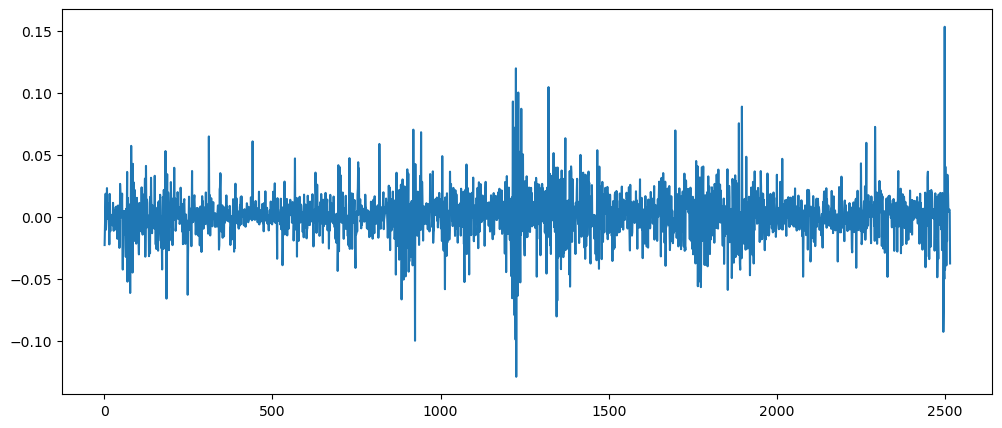

In [44]:
plt.figure(figsize=(12, 5))
plt.plot(df['Percentage Changed'])

# 4. Data Preprocessing

In [26]:
df.shape

(2516, 9)

#### Spliting data into Training and Testing datasets.


In [27]:
# Splitting data into Training and Testing
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1761, 1)
(755, 1)


In [28]:
data_training

Ticker        AAPL
0        28.742273
1        28.094620
2        27.918190
3        28.090872
4        28.620134
...            ...
1756    159.210220
1757    160.282837
1758    154.299789
1759    154.073456
1760    161.030731

[1761 rows x 1 columns]

In [29]:
data_testing

Ticker        AAPL
1761    155.136215
1762    155.441299
1763    156.937027
1764    163.372772
1765    154.270294
...            ...
2511    210.139999
2512    211.210007
2513    212.500000
2514    213.320007
2515    205.350006

[755 rows x 1 columns]

In [30]:
# Scaling down the data between 0 and 1

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_training_array = scaler.fit_transform(data_training)
data_training_array



array([[0.05099533],
       [0.04690158],
       [0.04578638],
       ...,
       [0.84463147],
       [0.84320084],
       [0.88717706]], shape=(1761, 1))

In [32]:
type(data_training_array)

numpy.ndarray

In [33]:
data_training_array.shape

(1761, 1)

# 5. Sequence Creation

In [34]:
# 12, 13, 12, 15, 10, 14, 16, 18, 19, 20  21

In [35]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    print(data_training_array[i-100: i])
    
x_train, y_train = np.array(x_train), np.array(y_train)

[[0.05099533]
 [0.04690158]
 [0.04578638]
 [0.04687789]
 [0.0502233 ]
 [0.04838049]
 [0.0477426 ]
 [0.04794107]
 [0.05210857]
 [0.05185344]
 [0.0538663 ]
 [0.05369621]
 [0.05368205]
 [0.05556733]
 [0.05719751]
 [0.0530583 ]
 [0.05648873]
 [0.05612018]
 [0.05399389]
 [0.05436244]
 [0.05354032]
 [0.05376706]
 [0.05268978]
 [0.05168328]
 [0.05047844]
 [0.04993979]
 [0.05200935]
 [0.05159824]
 [0.04958538]
 [0.04923101]
 [0.05019491]
 [0.04976966]
 [0.05059182]
 [0.0487774 ]
 [0.05020912]
 [0.04938693]
 [0.05091782]
 [0.05005316]
 [0.04899004]
 [0.04584309]
 [0.04711888]
 [0.0487774 ]
 [0.04855056]
 [0.04792688]
 [0.0474874 ]
 [0.04306474]
 [0.03952094]
 [0.04407118]
 [0.04744493]
 [0.04737407]
 [0.04908926]
 [0.05148486]
 [0.0530583 ]
 [0.05653128]
 [0.05466011]
 [0.04682125]
 [0.04673613]
 [0.04580058]
 [0.04334823]
 [0.04421294]
 [0.04366012]
 [0.0427812 ]
 [0.04126447]
 [0.03721038]
 [0.03182374]
 [0.03290106]
 [0.03325703]
 [0.0338124 ]
 [0.03979295]
 [0.03092183]
 [0.03341368]
 [0.03

In [36]:
x_train

array([[[0.05099533],
        [0.04690158],
        [0.04578638],
        ...,
        [0.03337097],
        [0.03079366],
        [0.03210365]],

       [[0.04690158],
        [0.04578638],
        [0.04687789],
        ...,
        [0.03079366],
        [0.03210365],
        [0.033072  ]],

       [[0.04578638],
        [0.04687789],
        [0.0502233 ],
        ...,
        [0.03210365],
        [0.033072  ],
        [0.03265899]],

       ...,

       [[0.89290171],
        [0.8866274 ],
        [0.8746999 ],
        ...,
        [0.90446906],
        [0.8756698 ],
        [0.8824497 ]],

       [[0.8866274 ],
        [0.8746999 ],
        [0.89631842],
        ...,
        [0.8756698 ],
        [0.8824497 ],
        [0.84463147]],

       [[0.8746999 ],
        [0.89631842],
        [0.93272174],
        ...,
        [0.8824497 ],
        [0.84463147],
        [0.84320084]]], shape=(1661, 100, 1))

In [43]:
x_train.ndim

3

In [38]:
y_train.ndim

1

In [39]:
x_train.shape

(1661, 100, 1)

In [40]:
y_train.shape

(1661,)

# 6. Model Building

In [45]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [47]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [49]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7. Model Training

In [50]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0438
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4.6081e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4.3741e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 3.6062e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 5.1042e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 4.5371e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 3.6174e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 3.5702e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 3.4038e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 4.1259e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 3.4597e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 3.9466e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 3.0767e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 3.4403e-04
Epoch 15/50
52/52 ━

In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [52]:
# Save the trained model
model.save('stock_prediction_model.keras')

# 8. Preparing and predicting the data

In [53]:
data_testing

Ticker        AAPL
1761    155.136215
1762    155.441299
1763    156.937027
1764    163.372772
1765    154.270294
...            ...
2511    210.139999
2512    211.210007
2513    212.500000
2514    213.320007
2515    205.350006

[755 rows x 1 columns]

In [55]:
data_training.tail(100)

Ticker        AAPL
1661    162.476944
1662    168.236145
1663    172.069092
1664    171.558029
1665    176.363953
...            ...
1756    159.210220
1757    160.282837
1758    154.299789
1759    154.073456
1760    161.030731

[100 rows x 1 columns]

In [56]:
data_testing

Ticker        AAPL
1761    155.136215
1762    155.441299
1763    156.937027
1764    163.372772
1765    154.270294
...            ...
2511    210.139999
2512    211.210007
2513    212.500000
2514    213.320007
2515    205.350006

[755 rows x 1 columns]

In [57]:
past_100_days = data_training.tail(100)

In [58]:
past_100_days

Ticker        AAPL
1661    162.476944
1662    168.236145
1663    172.069092
1664    171.558029
1665    176.363953
...            ...
1756    159.210220
1757    160.282837
1758    154.299789
1759    154.073456
1760    161.030731

[100 rows x 1 columns]

In [60]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker        AAPL
0       162.476944
1       168.236145
2       172.069092
3       171.558029
4       176.363953
..             ...
850     210.139999
851     211.210007
852     212.500000
853     213.320007
854     205.350006

[855 rows x 1 columns]

In [61]:
input_data = scaler.fit_transform(final_df)
input_data

array([[2.87777673e-01],
       [3.30390315e-01],
       [3.58750497e-01],
       [3.54969117e-01],
       [3.90528406e-01],
       [3.63550015e-01],
       [3.53296608e-01],
       [3.89437561e-01],
       [3.38244021e-01],
       [3.30099596e-01],
       [3.19991831e-01],
       [3.43552382e-01],
       [3.62822709e-01],
       [3.67476924e-01],
       [3.96927500e-01],
       [3.89364740e-01],
       [3.90019338e-01],
       [3.81438665e-01],
       [3.76857384e-01],
       [4.09144249e-01],
       [3.92346445e-01],
       [3.57586944e-01],
       [3.36353387e-01],
       [3.37589649e-01],
       [3.37734952e-01],
       [3.58750497e-01],
       [3.62022809e-01],
       [3.37734952e-01],
       [3.44134158e-01],
       [3.20355258e-01],
       [2.94394778e-01],
       [2.81887423e-01],
       [2.66616825e-01],
       [2.60872103e-01],
       [2.47491913e-01],
       [2.46837428e-01],
       [2.43419701e-01],
       [3.24209346e-01],
       [3.56569032e-01],
       [3.55332883e-01],


In [62]:
input_data.shape

(855, 1)

In [63]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])


In [64]:
x_test

[array([[0.28777767],
        [0.33039032],
        [0.3587505 ],
        [0.35496912],
        [0.39052841],
        [0.36355002],
        [0.35329661],
        [0.38943756],
        [0.33824402],
        [0.3300996 ],
        [0.31999183],
        [0.34355238],
        [0.36282271],
        [0.36747692],
        [0.3969275 ],
        [0.38936474],
        [0.39001934],
        [0.38143867],
        [0.37685738],
        [0.40914425],
        [0.39234645],
        [0.35758694],
        [0.33635339],
        [0.33758965],
        [0.33773495],
        [0.3587505 ],
        [0.36202281],
        [0.33773495],
        [0.34413416],
        [0.32035526],
        [0.29439478],
        [0.28188742],
        [0.26661682],
        [0.2608721 ],
        [0.24749191],
        [0.24683743],
        [0.2434197 ],
        [0.32420935],
        [0.35656903],
        [0.35533288],
        [0.36427698],
        [0.34289778],
        [0.3407862 ],
        [0.33547141],
        [0.35855236],
        [0

In [65]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [66]:
x_test.ndim

3

In [67]:
x_test[0].shape

(100, 1)

# 9. Making predicition

In [68]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step 


In [70]:
y_predicted

array([[0.25474066],
       [0.25211033],
       [0.24849463],
       [0.24968432],
       [0.2689306 ],
       [0.26265267],
       [0.25309426],
       [0.23228818],
       [0.22145073],
       [0.19754088],
       [0.16889562],
       [0.15844569],
       [0.15335833],
       [0.16034028],
       [0.15007506],
       [0.12994616],
       [0.11320355],
       [0.11419353],
       [0.11498189],
       [0.11592473],
       [0.1237702 ],
       [0.14488028],
       [0.162491  ],
       [0.17302696],
       [0.18356228],
       [0.17650396],
       [0.16779022],
       [0.1671057 ],
       [0.16741124],
       [0.15572433],
       [0.13176598],
       [0.10031537],
       [0.07776729],
       [0.06991936],
       [0.0586719 ],
       [0.05247269],
       [0.05843482],
       [0.06631997],
       [0.07879118],
       [0.09665333],
       [0.11132266],
       [0.11112471],
       [0.10952746],
       [0.10229736],
       [0.09993387],
       [0.10555197],
       [0.11536296],
       [0.131

In [71]:
y_test

array([2.33463222e-01, 2.35720557e-01, 2.46787526e-01, 2.94405955e-01,
       2.27056225e-01, 2.32452084e-01, 1.94388998e-01, 2.12253713e-01,
       1.53846614e-01, 1.25117134e-01, 1.58294447e-01, 1.46846776e-01,
       1.73826184e-01, 1.12429477e-01, 8.71269820e-02, 8.88769415e-02,
       1.29127703e-01, 1.09075199e-01, 1.10242027e-01, 1.34013138e-01,
       1.76742745e-01, 1.70909509e-01, 1.69961483e-01, 1.88190980e-01,
       1.45679948e-01, 1.51221675e-01, 1.69961483e-01, 1.64492577e-01,
       1.25700379e-01, 8.55228901e-02, 4.72410026e-02, 5.36575959e-02,
       7.31266289e-02, 3.39698745e-02, 4.49076857e-02, 7.63350384e-02,
       7.25433843e-02, 9.38356492e-02, 1.18554673e-01, 1.18554673e-01,
       8.77831604e-02, 1.00835487e-01, 8.25332820e-02, 9.86480378e-02,
       1.17825223e-01, 1.27742074e-01, 1.52753059e-01, 1.57784249e-01,
       1.41961115e-01, 1.49179980e-01, 1.46481994e-01, 1.68211410e-01,
       1.80607446e-01, 1.58003163e-01, 1.86659596e-01, 2.01534816e-01,
      

In [72]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [73]:
y_predicted

array([158.01192 , 157.65642 , 157.16774 , 157.32854 , 159.92973 ,
       159.08124 , 157.7894  , 154.97742 , 153.5127  , 150.28122 ,
       146.40974 , 144.99742 , 144.30984 , 145.25348 , 143.8661  ,
       141.14563 , 138.88283 , 139.01663 , 139.12318 , 139.25061 ,
       140.31094 , 143.16402 , 145.54414 , 146.96811 , 148.39198 ,
       147.43803 , 146.26035 , 146.16783 , 146.20912 , 144.62961 ,
       141.39159 , 137.14096 , 134.09354 , 133.03287 , 131.51274 ,
       130.67491 , 131.48071 , 132.5464  , 134.23192 , 136.64603 ,
       138.62862 , 138.60188 , 138.386   , 137.40883 , 137.0894  ,
       137.8487  , 139.17468 , 141.35823 , 143.41191 , 144.11183 ,
       144.43434 , 144.39262 , 145.16573 , 146.50061 , 146.61378 ,
       147.5583  , 149.12685 , 151.16595 , 152.26825 , 152.31583 ,
       151.55026 , 152.51042 , 153.87367 , 156.71939 , 158.72108 ,
       159.22995 , 161.28897 , 162.93307 , 163.77007 , 163.86743 ,
       163.71588 , 165.15097 , 166.23677 , 168.2256  , 170.154

In [74]:
y_test

array([155.13621521, 155.44129944, 156.93702698, 163.37277222,
       154.27029419, 154.9995575 , 149.85523987, 152.2696991 ,
       144.37583923, 140.49298096, 144.97697449, 143.42979431,
       147.0761261 , 138.7782135 , 135.35852051, 135.59503174,
       141.03501892, 138.32487488, 138.48257446, 141.69529724,
       147.4703064 , 146.68193054, 146.55380249, 149.01756287,
       143.27209473, 144.02107239, 146.55380249, 145.81466675,
       140.57180786, 135.14172363, 129.96783447, 130.83505249,
       133.46633911, 128.17420959, 129.65248108, 133.89996338,
       133.38751221, 136.26521301, 139.60604858, 139.60604858,
       135.44720459, 137.21125793, 134.7376709 , 136.9156189 ,
       139.50746155, 140.8477478 , 144.2280426 , 144.90802002,
       142.76948547, 143.74513245, 143.38049316, 146.317276  ,
       147.99263   , 144.93760681, 148.81059265, 150.8210144 ,
       153.09753418, 151.85580444, 150.7322998 , 149.4019165 ,
       154.51667786, 155.06854248, 160.15368652, 159.16

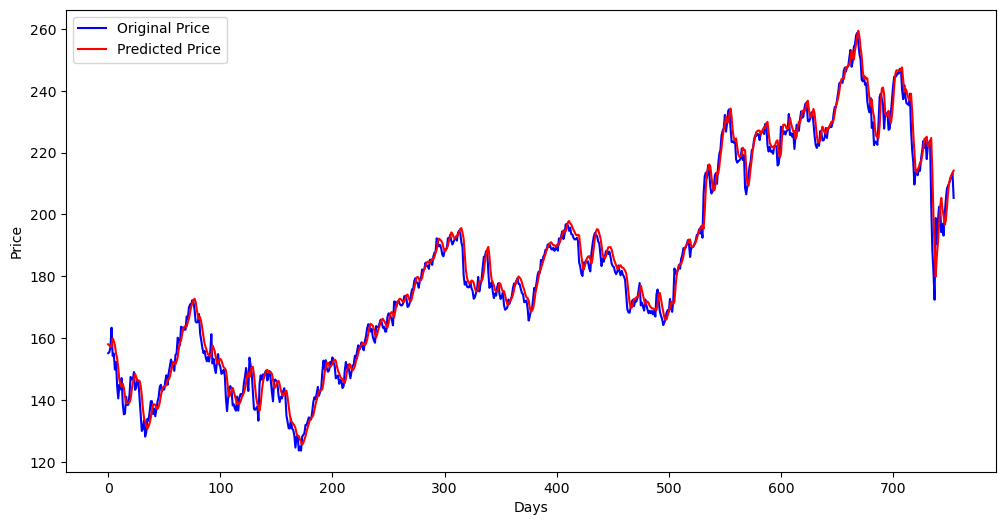

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

(140.0, 220.0)

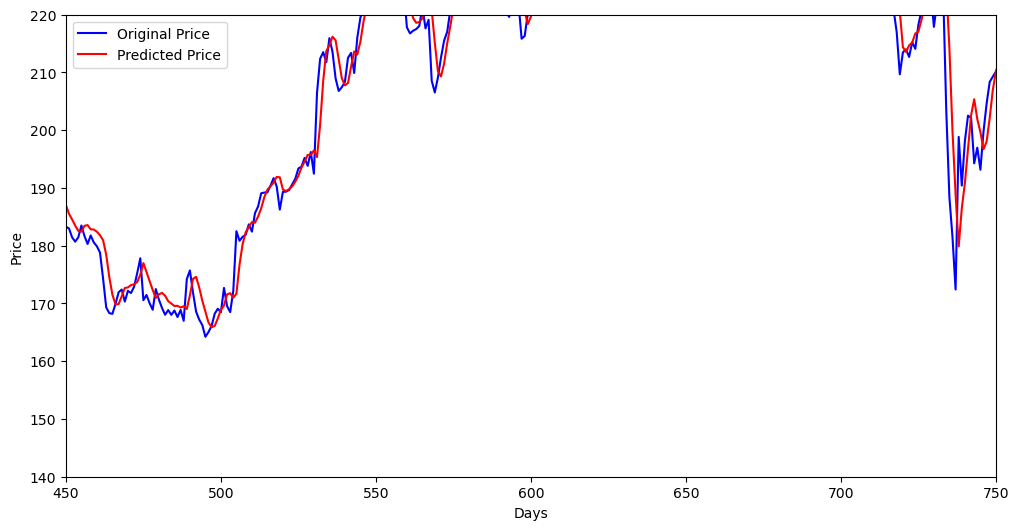

In [76]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(140, 220)

# 10. Model Evaluation

In [81]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 16.05265601730253


In [83]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (MSE): {rmse}")

Root Mean Squared Error (MSE): 4.006576595711422


In [84]:
# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f"R_SQUARED: {r2}")

R_SQUARED: 0.9851931724242746
